# Summer Course Group 1
### Members of the group:
- Fikry Idham Dwiyana (Group Leader)
- Ananda Myzza Marhelio

# Assignment: Course 4B

## Import Library and Dataset

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Setting up the directories
directory = 'D:\\KULIAH\\SEMESTER 6\\Summer Course\\Course-4B\\tomato\\train'
directory_test = 'D:\\KULIAH\\SEMESTER 6\\Summer Course\\Course-4B\\tomato\\test'

## Pre-proccesing Dataset

In [3]:
# Define the classes
classes = ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_mosaic_virus', 'Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Load training data
train_data = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=64,
    class_mode='sparse',
    subset='training'
)

# Load validation data
validation_data = datagen.flow_from_directory(
    directory,
    target_size=(150, 150),
    batch_size=64,
    class_mode='sparse',
    subset='validation'
)

Found 12053 images belonging to 10 classes.
Found 3011 images belonging to 10 classes.


In [44]:
# Only rescale for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow validation images in batches
test_generator = test_datagen.flow_from_directory(
    directory_test,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=64
)

Found 3771 images belonging to 10 classes.


## Define First Model

In [8]:
# Define a simpler model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

C:\Users\anand\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,987,248 (60.99 MB)

 Trainable params: 5,329,082 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,658,166 (40.66 MB)

In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training and Plotting the First Model

In [11]:
# Train the model
history = model.fit(
    train_data,
    epochs=30,
    validation_data=validation_data
)

Epoch 1/30


C:\Users\anand\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 118s 607ms/step - accuracy: 0.1860 - loss: 2.1587 - val_accuracy: 0.4949 - val_loss: 1.5150
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 600ms/step - accuracy: 0.5748 - loss: 1.2701 - val_accuracy: 0.6363 - val_loss: 1.0660
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 597ms/step - accuracy: 0.7108 - loss: 0.8466 - val_accuracy: 0.7679 - val_loss: 0.7119
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 118s 612ms/step - accuracy: 0.7639 - loss: 0.6760 - val_accuracy: 0.7715 - val_loss: 0.6397
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 601ms/step - accuracy: 0.7987 - loss: 0.5955 - val_accuracy: 0.8074 - val_loss: 0.5440
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 600ms/step - accuracy: 0.8092 - loss: 0.5447 - val_accuracy: 0.8160 - val_loss: 0.5228
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 115s 598ms/step - accuracy: 0.8250 - loss: 0.5147 - val_accuracy: 0.8436 - val_loss: 0.4770
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 116s 601ms/step - accuracy: 0.8415 - loss: 0.45

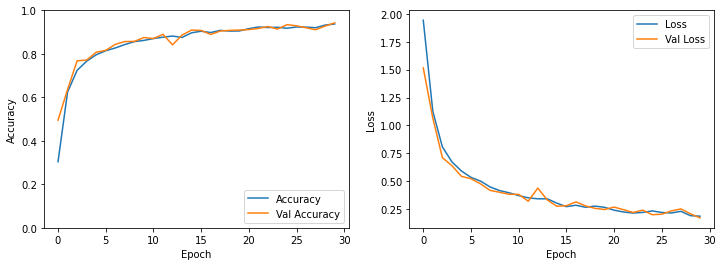

In [12]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

## Define Second Model

In [14]:
# Define a simpler model
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

C:\Users\anand\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,988,016 (60.99 MB)

 Trainable params: 5,329,274 (20.33 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 10,658,550 (40.66 MB)

In [15]:
# Compile the model
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training and Plotting the Second Model

In [16]:
# Train the model
history_2 = model_2.fit(
    train_data,
    epochs=30,
    validation_data=validation_data
)

Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.2563 - loss: 2.4034 - val_accuracy: 0.1129 - val_loss: 80.6664
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.3340 - loss: 1.8577 - val_accuracy: 0.1501 - val_loss: 19.0800
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.3610 - loss: 1.7760 - val_accuracy: 0.3457 - val_loss: 2.6100
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.4321 - loss: 1.6285 - val_accuracy: 0.1146 - val_loss: 7.1796
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5080 - loss: 1.4516 - val_accuracy: 0.3743 - val_loss: 1.7472
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5617 - loss: 1.3103 - val_accuracy: 0.5908 - val_loss: 1.2219
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6219 - loss: 1.1245 - val_accuracy: 0.5839 - val_loss: 1.2096
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.6481 - loss: 1.0397 - val_ac

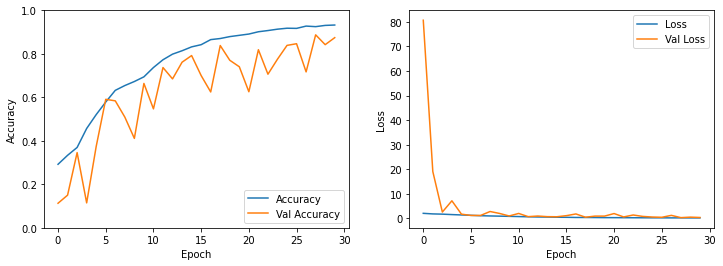

In [17]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Loss')
plt.plot(history_2.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

# Define Third Model

In [18]:
# Define a simpler model
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

In [28]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,988,016 (60.99 MB)

 Trainable params: 5,329,274 (20.33 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 10,658,550 (40.66 MB)

In [19]:
# Compile the model
model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### Training and Plotting the Third Model

In [20]:
# Train the model
history_3 = model_3.fit(
    train_data,
    epochs=30,
    validation_data=validation_data
)

Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.2660 - loss: 2.5301 - val_accuracy: 0.0844 - val_loss: 71.9607
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.2771 - loss: 2.2417 - val_accuracy: 0.0850 - val_loss: 67.3352
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.2869 - loss: 2.2008 - val_accuracy: 0.1471 - val_loss: 14.2892
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.2840 - loss: 2.1782 - val_accuracy: 0.2936 - val_loss: 3.1202
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.2798 - loss: 2.1669 - val_accuracy: 0.2976 - val_loss: 2.4799
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.2840 - loss: 2.1522 - val_accuracy: 0.2976 - val_loss: 2.4782
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.2847 - loss: 2.1467 - val_accuracy: 0.2992 - val_loss: 2.4643
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.2872 - loss: 2.1408 - val_a

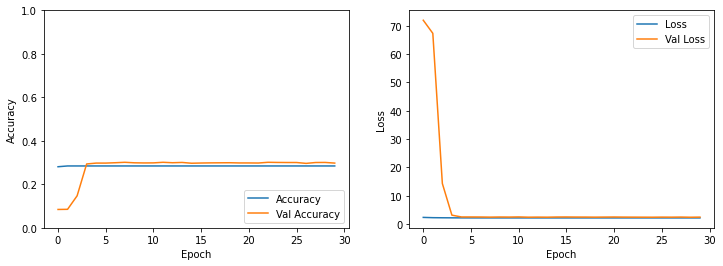

In [21]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'], label='Accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'], label='Loss')
plt.plot(history_3.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

## Save Models

In [30]:
model.save('D:/KULIAH/SEMESTER 6/Summer Course/Course-4B/model/model_base.h5')
model_2.save('D:/KULIAH/SEMESTER 6/Summer Course/Course-4B/model/model_2_base.h5')
model_3.save('D:/KULIAH/SEMESTER 6/Summer Course/Course-4B/model/model_3_base.h5')